In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities.iterables import multiset_permutations
from mpl_toolkits import mplot3d

In [2]:
base = np.array([1 ,2, 3])

In [3]:
base

array([1, 2, 3])

In [4]:
for p in multiset_permutations(base):
    print(p)

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 1, 2]
[3, 2, 1]


In [5]:
def gen_pur(ARRAY):
    s = np.math.factorial(ARRAY.size)
    pur_arr = np.zeros([s,ARRAY.size])
    count = 0
    for purr in multiset_permutations(ARRAY):
        pur_arr[count] = purr
        count+=1
    pur_arr = np.unique(pur_arr,axis=0)
    return pur_arr
# this function gives all the purmutation of the array        

In [6]:
kk = gen_pur(base)

In [7]:
kk

array([[1., 2., 3.],
       [1., 3., 2.],
       [2., 1., 3.],
       [2., 3., 1.],
       [3., 1., 2.],
       [3., 2., 1.]])

In [8]:
kk.shape

(6, 3)

In [9]:
num = 7

In [10]:
np.arange(-num,num+1) 

array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [11]:
tot = np.zeros([2*num+1,3])

In [12]:
for i in range(3):
    tot[:,i] = np.arange(-num,num+1)

In [13]:
a=1
b=1
c=1
tot_ind = (2*num+1)
sizee =tot_ind**3
final_latt = np.zeros([sizee,3 ])
for index in range(sizee):
    final_latt[index] = np.array([ a*(index//(tot_ind**2)%tot_ind -num),
                                  b*((index//tot_ind)%tot_ind-num), c*(index%tot_ind-num) ])

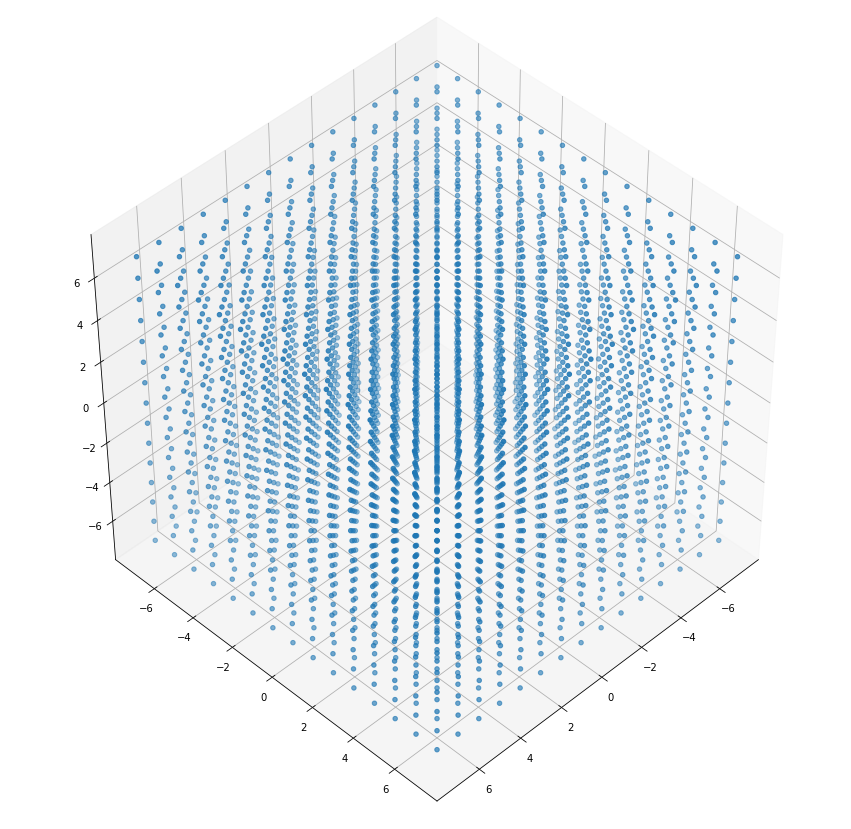

In [14]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(final_latt[:,0],final_latt[:,1],final_latt[:,2]);
ax.view_init(45,45)

In [15]:
radius = num 
for i in range(final_latt.shape[0]):
    [x,y,z] = [final_latt[i,0],final_latt[i,1],final_latt[i,2]]
    if [x,y,z] != [0.0,0.0,0.0]:
        k = radius/((x**2+y**2+z**2)**(0.5))
        x=x*k
        y=y*k
        z=z*k
    [final_latt[i,0],final_latt[i,1],final_latt[i,2]] = [x,y,z]

In [16]:
final_latt

array([[-4.04145188, -4.04145188, -4.04145188],
       [-4.23295529, -4.23295529, -3.62824739],
       [-4.41818121, -4.41818121, -3.15584372],
       ...,
       [ 4.41818121,  4.41818121,  3.15584372],
       [ 4.23295529,  4.23295529,  3.62824739],
       [ 4.04145188,  4.04145188,  4.04145188]])

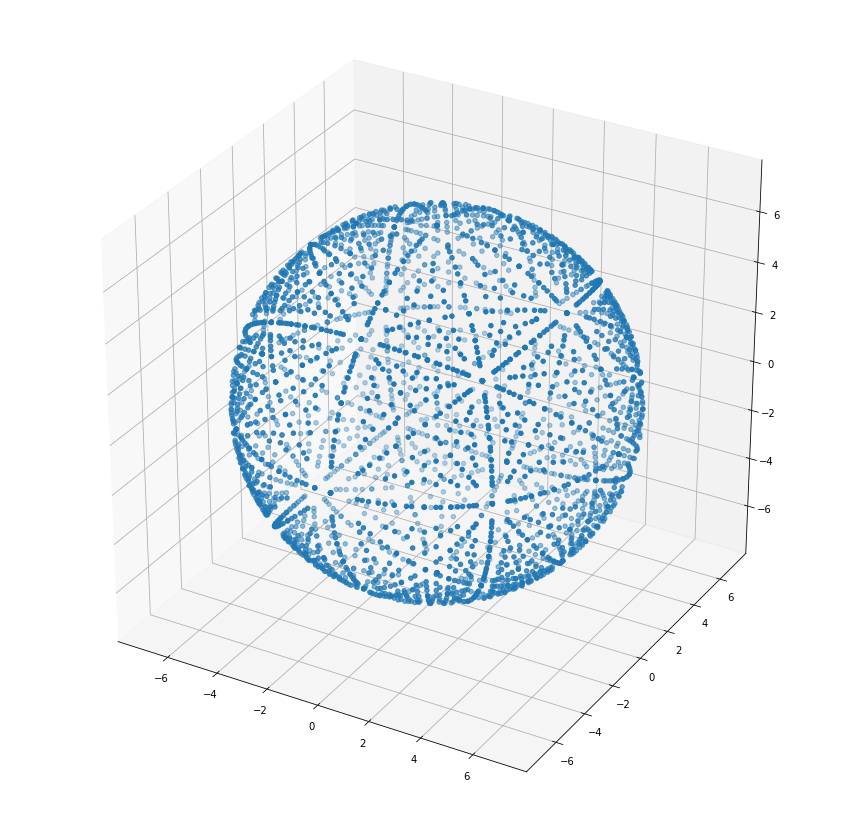

In [17]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(final_latt[:,0],final_latt[:,1],final_latt[:,2]);
#ax.view_init(45,45)

In [18]:
centre = np.array([0,0,radius])

In [19]:
PROJ = np.zeros([final_latt.shape[0],2])
for i in range(final_latt.shape[0]):
    xyz = np.array([final_latt[i,0],final_latt[i,1],final_latt[i,2]])
    #print(xyz[2],"z")
    d = xyz - centre
    #print(d,"D")
    if xyz[2] <= 0.0 :
        y = centre[1] + (centre[2]-xyz[2])*d[1]/d[2]
        x = centre[0] + (centre[2]-xyz[2])*d[0]/d[2]
        PROJ[i,:] = np.array([x,y])

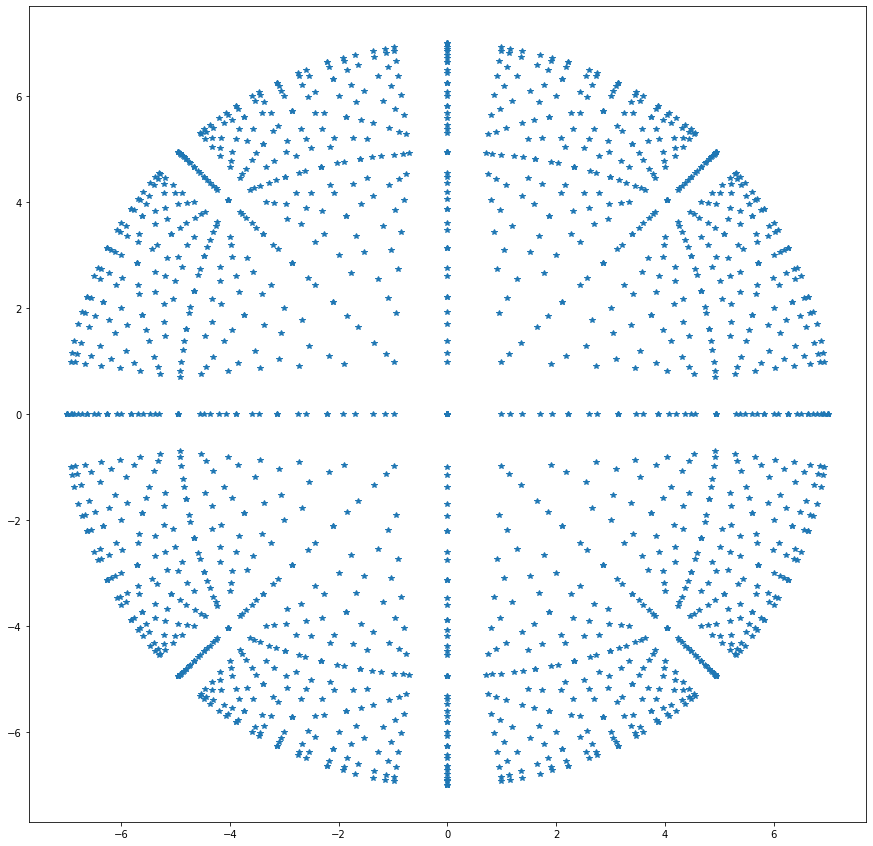

In [20]:
fig = plt.figure(figsize=(15,15))
plt.plot(PROJ[:,0],PROJ[:,1], '*')